In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
from zipfile import ZipFile 

In [2]:
df2 = pd.read_json("./train.json")
df2.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [4]:
df2.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


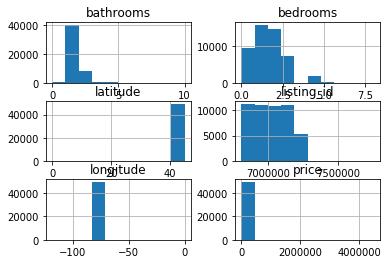

In [5]:
# show histrograms for numerical attirbutes/columns
df2.hist()
plt.show()

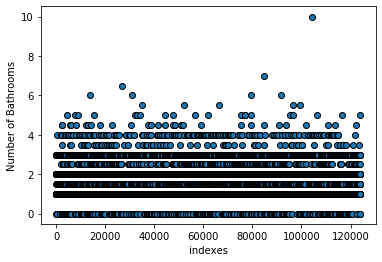

count    49352.00000
mean         1.21218
std          0.50142
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         10.00000
Name: bathrooms, dtype: float64

In [44]:
indexes = list(df2.index.values.tolist())
values = list(df2['bathrooms'][indexes])

# for index in indexes:
#     print(index, ",", df2['bathrooms'][index])
 
plt.scatter(indexes, df2['bathrooms'][indexes], edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Number of Bathrooms')
plt.show()
df2['bathrooms'].describe()

In [38]:
# For testing
# df2['bathrooms'].head(10)

4     1.0
6     1.0
9     1.0
10    1.5
15    1.0
16    1.0
18    2.0
19    1.0
23    0.0
32    3.0
Name: bathrooms, dtype: float64

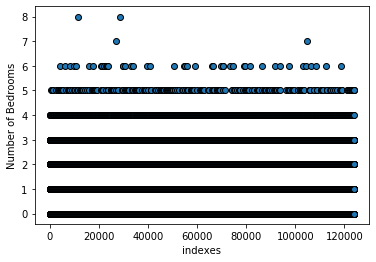

In [43]:
indexes = list(df2.index.values.tolist())
values = list(df2['bedrooms'][indexes])
    
plt.scatter(indexes, df2['bedrooms'][indexes], edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Number of Bedrooms')
plt.show()
df2['bedrooms'].describe()

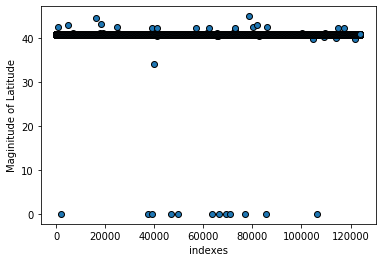

count    49352.000000
mean        40.741545
std          0.638535
min          0.000000
25%         40.728300
50%         40.751800
75%         40.774300
max         44.883500
Name: latitude, dtype: float64

In [45]:
indexes = list(df2.index.values.tolist())
values = list(df2['latitude'][indexes])
    
plt.scatter(indexes, df2['latitude'][indexes], edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Maginitude of Latitude')
plt.show()
df2['latitude'].describe()

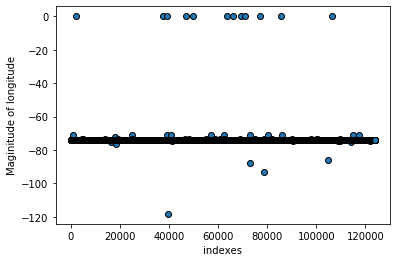

count    49352.000000
mean       -73.955716
std          1.177912
min       -118.271000
25%        -73.991700
50%        -73.977900
75%        -73.954800
max          0.000000
Name: longitude, dtype: float64

In [47]:
indexes = list(df2.index.values.tolist())
values = list(df2['longitude'][indexes])
    
plt.scatter(indexes, df2['longitude'][indexes], edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Maginitude of longitude')
plt.show()
df2['longitude'].describe()

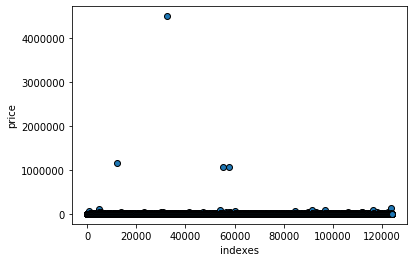

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [46]:
indexes = list(df2.index.values.tolist())
values = list(df2['price'][indexes])
    
plt.scatter(indexes, df2['price'][indexes], edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('price')
plt.show()
df2['price'].describe()